Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

###Replicating the lesson code 

In [0]:
#Running the imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#practicing for when we move to the local machine 
%matplotlib inline

In [62]:
#Showing available plot styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
#setting plot style to fast 
plt.style.use('fast')

In [64]:
#reading in titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [65]:
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [66]:
#converting pclass to strings 
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
231,1,2,male,42.0,13.0000,Southampton,second
1,1,1,female,38.0,71.2833,Cherbourg,first
582,0,2,male,23.0,13.0000,Southampton,second
120,0,2,male,51.0,12.5250,Southampton,second
307,0,2,male,18.0,73.5000,Southampton,second


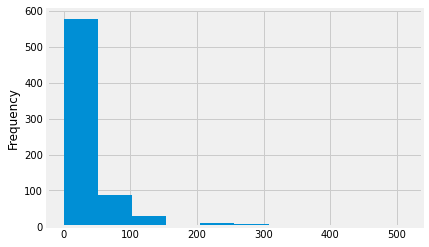

In [67]:
#displaying fare with a histogram 
titanic['Fare'].plot(kind='hist');

In [68]:
#removing the two outliers
print(titanic.shape)
titanic=titanic[titanic['Fare']<500]
print(titanic.shape)

(712, 7)
(709, 7)


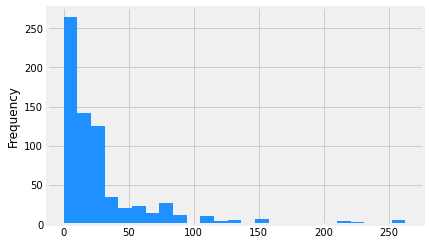

In [69]:
#displaying the new hist
titanic['Fare'].plot(kind='hist', color='dodgerblue', bins=25);

In [70]:
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [71]:
#converting continuous to categorical using binning 
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins= [0,8,15,32,264], labels=farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [0]:
#checking the result of this 
fare_results = titanic['fare_groups'].value_counts().sort_index()

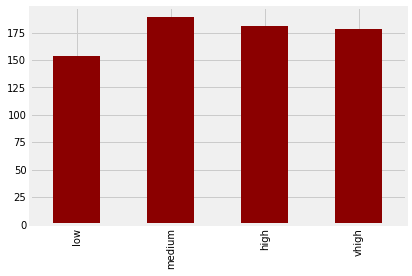

In [73]:
fare_results.plot(kind='bar', color='darkred');

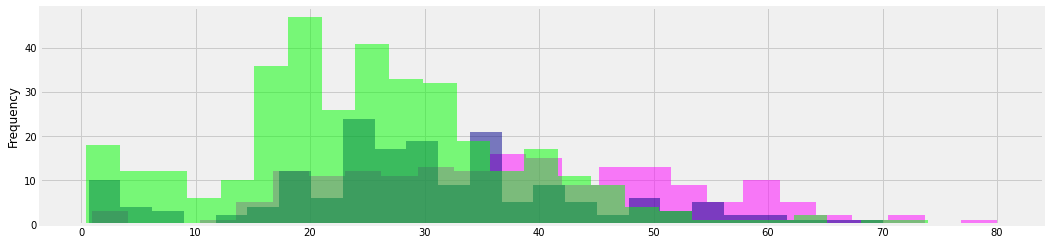

In [74]:
#stacking histograms
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='magenta', alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='darkblue', alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='lime', alpha=0.5)

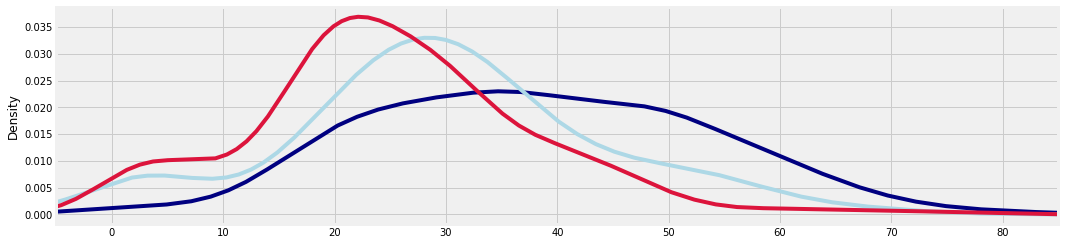

In [75]:
#stacking density plots
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,4), color='navy', xlim=(-5,85))
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,4), color='lightblue', xlim=(-5,85))
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,4), color='crimson', xlim=(-5,85));

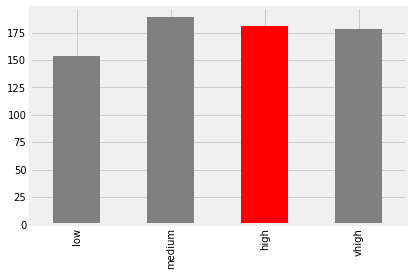

In [76]:
#making a value pop
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['gray', 'gray', 'red', 'grey'])

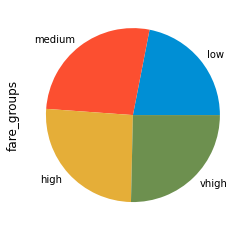

In [77]:
#making a pie chart 
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie', figsize=(4,4))

In [78]:
#getting a crosstab with percents 
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


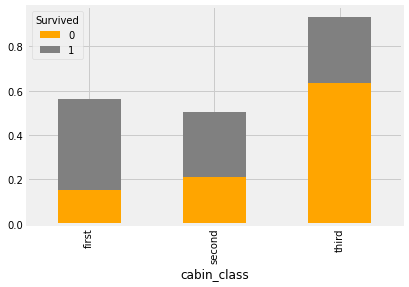

In [79]:
#making a stacked chart 
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

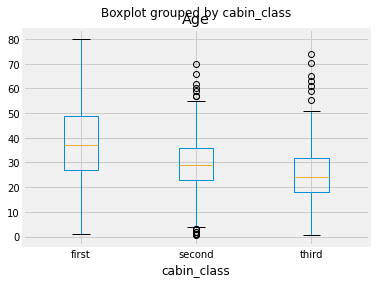

In [80]:
#breaking continuous variables by categorical variables 
titanic.boxplot(column='Age', by='cabin_class');

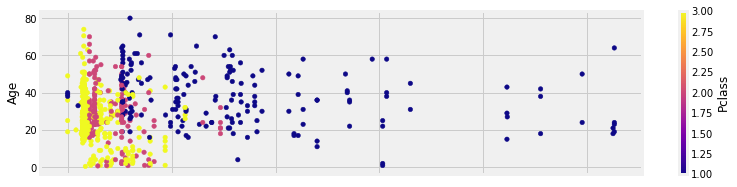

In [81]:
#compairing multiple contiuous variables 
titanic.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(12,3))

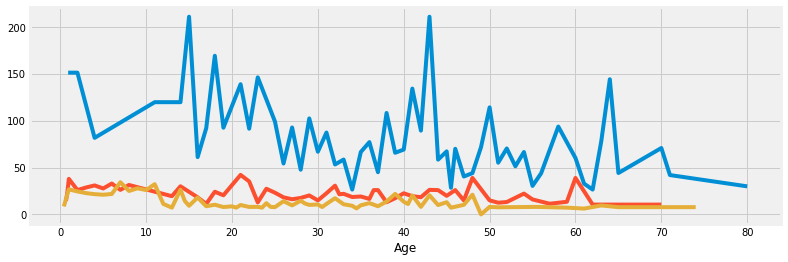

In [82]:
#multiple line graphs 
mycolors=['crimson', 'purple', 'dodgerblue']
for x in [1,2,3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4));

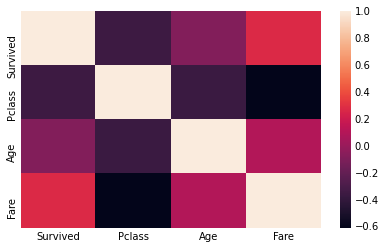

In [83]:
#heatmap
sns.heatmap(titanic.corr());

In [84]:
#creating data to plot 
x = np.linspace(0, 5 ,11)
y = x**2
x, y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
        20.25, 25.  ]))

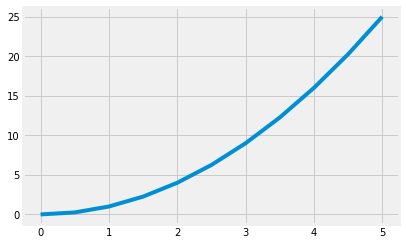

In [85]:
#basic matplotlib
plt.plot(x,y);

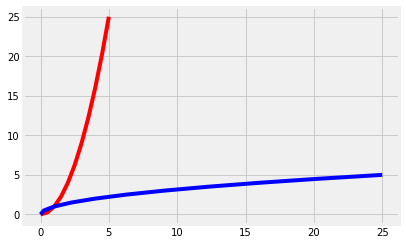

In [86]:
#putting two plots together 
plt.plot(x,y,'r')
plt.plot(y,x,'b');

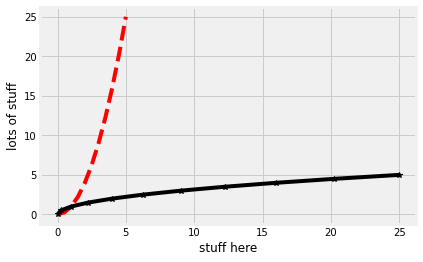

In [87]:
#labels and texture 
plt.plot(x,y,'r--')
plt.plot(y,x, 'k*-')
plt.xlabel('stuff here')
plt.ylabel('lots of stuff');

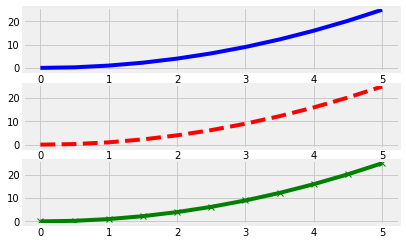

In [88]:
# multiple matplotlibs
plt.subplot(3,1,1)
plt.plot(x,y,'b')
plt.subplot(3,1,2)
plt.plot(x,y,'r--')
plt.subplot(3,1,3)
plt.plot(x,y,'g-x');

In [0]:
#object oriented matplotlib


###Part 2 recreating a visualization 

In [90]:
#displaying the image I want to recreate 
from IPython.display import display,Image

url='https://fivethirtyeight.com/wp-content/uploads/2017/06/hickeydottle-steak-1-rd.png?w=575'
example= Image(url=url, width=400, height=250)

display(example)

In [91]:
steaks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv')
steaks.sample(5)

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
142,3.234872e+09,Lottery B,Yes,Yes,Yes,No,Yes,No,Yes,Medium,Male,18-29,"$0 - $24,999",High school degree,Pacific
113,3.234885e+09,Lottery B,No,No,Yes,No,Yes,Yes,No,NaN,Male,30-44,"$50,000 - $99,999",Some college or Associate degree,East South Central
517,3.234771e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Medium Well,Male,30-44,"$50,000 - $99,999",Graduate degree,East North Central
126,3.234880e+09,Lottery B,No,Yes,Yes,No,Yes,No,Yes,Medium rare,Male,30-44,"$100,000 - $149,999",Graduate degree,Pacific
393,3.234805e+09,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium Well,NaN,NaN,NaN,NaN,NaN


In [92]:
steaks.columns

Index(['RespondentID',
       'Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?',
       'Do you ever smoke cigarettes?', 'Do you ever drink alcohol?',
       'Do you ever gamble?', 'Have you ever been skydiving?',
       'Do you ever drive above the speed limit?',
       'Have you ever cheated on your significant other?', 'Do you eat steak?',
       'How do you like your steak prepared?', 'Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)'],
      dtype='object')

In [93]:
#cutting data down to only respondant id and how do you like your steak prepared
steak_type = steaks[['RespondentID', 'How do you like your steak prepared?']]
steak_type.sample(10)

,RespondentID,How do you like your steak prepared?
380,3.234810e+09,Medium rare
540,3.234764e+09,NaN
113,3.234885e+09,NaN
418,3.234797e+09,Medium rare
156,3.234869e+09,Medium Well
222,3.234847e+09,Medium
53,3.234919e+09,Medium rare
107,3.234888e+09,NaN
535,3.234764e+09,Medium Well
158,3.234869e+09,Medium rare


In [94]:
steak_type.shape

(551, 2)

In [95]:
# dropping null values 
steak_type.dropna(inplace=True)
steak_type.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(432, 2)

In [96]:
#changing the name of the column for easier access
steak_type = steak_type.rename(columns={
  'How do you like your steak prepared?': 'Steak'                 
})
steak_type.head()

,RespondentID,Steak
2,3.234982e+09,Medium rare
3,3.234973e+09,Rare
4,3.234972e+09,Medium
5,3.234959e+09,Medium
6,3.234955e+09,Medium rare


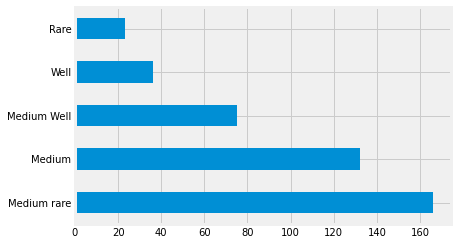

In [97]:
#getting a basic bar plot 
steak_type['Steak'].value_counts().plot(kind='barh');

In [0]:
#setting plot type to fivethirtyeight 
plt.style.use('fivethirtyeight')

In [99]:
steak_data = pd.DataFrame(steak_type['Steak'].value_counts(normalize=True))
new_index = ['Well', 'Medium Well', 'Medium', 'Medium rare', 'Rare']
steak_data=steak_data.reindex(new_index)
steak_data.reset_index(inplace=True)
steak_data

,index,Steak
0,Well,0.083333
1,Medium Well,0.173611
2,Medium,0.305556
3,Medium rare,0.384259
4,Rare,0.053241


In [100]:
display(example)

''

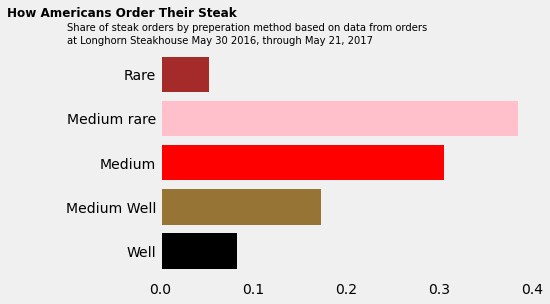

In [103]:
fig, ax = plt.subplots()

ax.barh(y=steak_data['index'], width=steak_data['Steak'], color = ['black',
                                                                           '#967435',
                                                                           'red',
                                                                           'pink',
                                                                           'brown'])


ax.set_title('How Americans Order Their Steak',
             fontsize=12,
             x=-0.1,
             y=1.1,
             fontweight='bold')
ax.text(s='Share of steak orders by preperation method based on data from orders',
        fontsize=10,
        x = -0.1,
        y=5)
ax.text(s='at Longhorn Steakhouse May 30 2016, through May 21, 2017',
        fontsize=10,
        x=-0.1,
        y=4.7)
ax.grid(False)
;

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here